In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_df = pd.read_excel(r"/content/one_data.xlsx")

In [ ]:
X_df

,Series_ID,Measurement_ID,Va_56,Vb_56,Vc_56,Ia_56,Ib_56,Ic_56,Va_67,Vb_67,...,Vc_910,Ia_910,Ib_910,Ic_910,Va_1011,Vb_1011,Vc_1011,Ia_1011,Ib_1011,Ic_1011
0,1,1,100628.299942,-186161.998809,85533.698755,1326.670586,-2498.403236,1171.732649,70812.684976,-183939.767009,...,179387.167346,-115.097764,4415.773169,-4300.675407,-13255.639211,-154552.937197,167808.576443,-293.411560,2349.624149,-2056.212589
1,1,2,-174856.647284,144363.624217,30493.023264,-2346.135822,1954.874782,391.261040,-159669.641995,162445.965570,...,-109712.424679,3102.292487,-5003.104075,1900.811588,-100951.019730,186893.313448,-85942.293632,1764.858338,-2502.632443,737.774104
2,1,3,180109.180376,-47187.823384,-132921.357196,2416.651154,-659.057642,-1757.593513,185245.695798,-78255.251951,...,-1505.302360,-4858.039315,3627.776318,1230.262999,174237.191521,-146175.388439,-28061.803254,-2518.649730,1672.733239,845.916491
3,1,4,-116712.469422,-67950.562444,184663.032000,-1594.118000,-885.754191,2479.872191,-140183.805213,-35754.225527,...,112138.044587,4740.622157,-883.807890,-3856.814271,-181046.965705,49702.823011,131344.142886,2327.186236,-216.603559,-2110.582678
4,1,5,8815.918754,157116.495259,-165932.414026,140.123473,2094.313750,-2234.437223,41684.391729,136066.787921,...,-179965.295525,-2830.958052,-2210.081547,5041.039602,118849.920845,65664.237432,-184514.158416,-1232.152927,-1332.085688,2564.238616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22039,44,497,-177580.000317,44172.853198,133407.147321,-2427.295419,637.263899,1790.031521,-183073.491428,75480.453257,...,-241.375979,4777.596408,-3652.465576,-1125.130835,-172928.890433,146924.579587,26004.311015,2473.217925,-1664.612752,-808.605174
22040,44,498,113634.962094,69509.108047,-183144.070272,1573.722987,912.482499,-2486.205486,137422.608407,37294.007348,...,-110330.869079,-4688.239693,933.755254,3754.484442,180934.202880,-51351.881549,-129582.321522,-2289.701338,232.377313,2057.324025
22041,44,499,-6514.557623,-156781.134816,163295.692449,-122.906289,-2113.094606,2236.000894,-39528.368990,-135911.035492,...,178791.350686,2875.868473,2095.233525,-4971.102002,-119865.167961,-63830.363195,183695.531296,1237.405069,1286.381030,-2523.786100
22042,44,500,-103088.460092,184489.861603,-81401.401396,-1373.256085,2508.837153,-1135.581068,-73417.643206,182889.676688,...,-178986.427067,109.086376,-4378.277697,4269.191323,13003.860934,154627.684765,-167631.545735,294.393723,-2319.852901,2025.459177


In [ ]:
X = X_df.drop(['Series_ID'], axis=1)

In [ ]:
y = pd.read_excel(r"/content/y_2.xlsx")

In [ ]:
FEATURE_COLUMNS=X.columns.tolist()[1:]
FEATURE_COLUMNS

['Va_56',
 'Vb_56',
 'Vc_56',
 'Ia_56',
 'Ib_56',
 'Ic_56',
 'Va_67',
 'Vb_67',
 'Vc_67',
 'Ia_67',
 'Ib_67',
 'Ic_67',
 'Va_79',
 'Vb_79',
 'Vc_79',
 'Ia_79',
 'Ib_79',
 'Ic_79',
 'Va_910',
 'Vb_910',
 'Vc_910',
 'Ia_910',
 'Ib_910',
 'Ic_910',
 'Va_1011',
 'Vb_1011',
 'Vc_1011',
 'Ia_1011',
 'Ib_1011',
 'Ic_1011']

In [ ]:
sequences=[]

for Series_ID, group in X_df.groupby("Series_ID"):
  sequence_features=group[FEATURE_COLUMNS]
  label=y[y.Series_ID==Series_ID].iloc[0].label

  sequences.append((sequence_features,label))

In [ ]:
train_sequences, test_sequences = train_test_split(sequences, test_size=0.3)

In [ ]:
len(train_sequences), len(test_sequences)

(30, 14)

In [ ]:
x_train = [sample for sample, series_id in train_sequences]

In [ ]:
x_train=np.array(x_train)
x_train.shape

(30, 501, 30)

In [ ]:
X_train_flattened = x_train.reshape(30, 501 * 30)
X_train_flattened

array([[ 100628.29994159, -186161.99880862,   85533.69875505, ...,
           -713.65939302,    2475.25651705,   -1761.59712368],
       [ 100628.29994159, -186161.99880862,   85533.69875505, ...,
          -1311.59146951,    2533.92298549,   -1222.33151549],
       [ 100628.29994159, -186161.99880861,   85533.69875504, ...,
          -2135.90994547,    2354.70947055,    -218.79952432],
       ...,
       [ 100628.29994159, -186161.99880862,   85533.69875504, ...,
           -659.01168631,    2462.20938344,   -1803.1976968 ],
       [ 100628.29994159, -186161.99880862,   85533.69875505, ...,
          -1223.0670134 ,    2536.90006099,   -1313.83304712],
       [ 100628.29994159, -186161.99880861,   85533.69875504, ...,
          -1471.98786778,    2569.75191913,   -1097.76405076]])

In [ ]:
Y_train = [series_id for sample, series_id in train_sequences]

In [ ]:
x_test = [sample for sample, series_id in test_sequences]

In [ ]:
x_test=np.array(x_test)
x_test.shape

(14, 501, 30)

In [ ]:
X_test_flattened = x_test.reshape(14, 501 * 30)
X_test_flattened.shape

(14, 15030)

In [ ]:
Y_test = [series_id for sample, series_id in test_sequences]

In [ ]:
# Fit the model to the training data
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    max_features='log2',
    max_depth=10,
    min_samples_split= 5,
    min_samples_leaf= 2
)

In [ ]:
rf_classifier.fit(X_train_flattened, Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500)

In [ ]:
y_pred = rf_classifier.predict(X_test_flattened)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Test Set Accuracy: {accuracy}")
print("Test Set Classification Report:\n", report)


Test Set Accuracy: 0.7857142857142857
Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         4
           3       0.60      1.00      0.75         3
           4       1.00      0.50      0.67         2

    accuracy                           0.79        14
   macro avg       0.86      0.75      0.75        14
weighted avg       0.85      0.79      0.77        14



In [ ]:
y_pred

array([3, 4, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1])

In [ ]:
Y_test

[4, 4, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2, 1, 1]

In [ ]:
y_pred_train = rf_classifier.predict(X_train_flattened)
train_accuracy = accuracy_score(Y_train, y_pred_train)
report_train = classification_report(Y_train, y_pred_train)

print(f"\nTraining Set Accuracy: {train_accuracy}")
print("Training Set Classification Report:\n", report_train)


Training Set Accuracy: 0.9333333333333333
Training Set Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.89      1.00      0.94         8
           3       0.90      1.00      0.95         9
           4       1.00      0.83      0.91         6

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



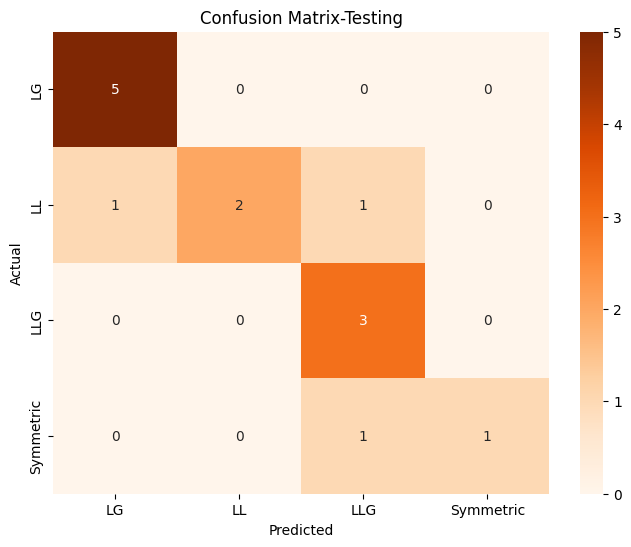

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
array=['LG', 'LL','LLG','Symmetric']
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=array, yticklabels=array)
plt.title('Confusion Matrix-Testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

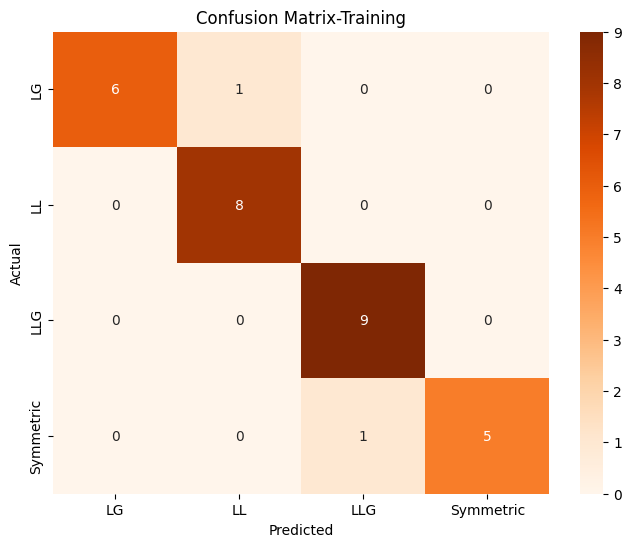

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_train, y_pred_train)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
array=['LG', 'LL','LLG','Symmetric']
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=array, yticklabels=array)
plt.title('Confusion Matrix-Training')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
Y_test

[4, 4, 1, 3, 1, 2, 2, 2, 3, 3, 1, 2, 1, 1]

In [ ]:
y_pred

array([3, 4, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1])

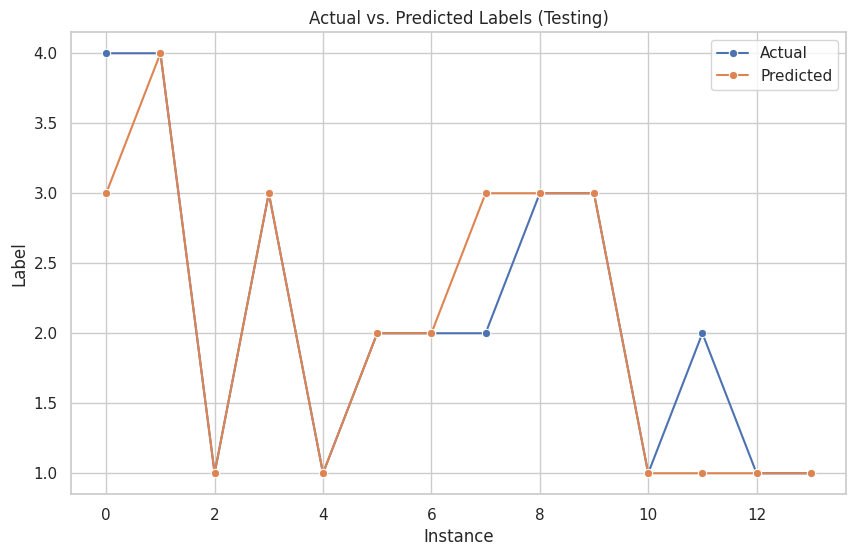

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for Actual and Predicted labels
df = pd.DataFrame({'Instance': np.arange(len(Y_test)),
                   'Actual': Y_test,
                   'Predicted': y_pred})

# Set up the Seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(x='Instance', y='Actual', data=df, marker='o', label='Actual')
sns.lineplot(x='Instance', y='Predicted', data=df, marker='o', label='Predicted')

plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels (Testing)' )
plt.legend()

plt.show()

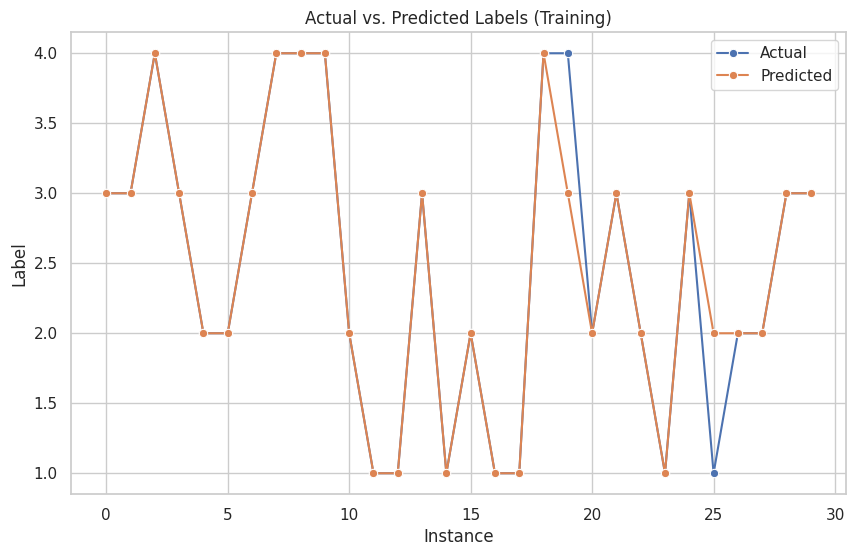

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for Actual and Predicted labels
df = pd.DataFrame({'Instance': np.arange(len(Y_train)),
                   'Actual': Y_train,
                   'Predicted': y_pred_train})

# Set up the Seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(x='Instance', y='Actual', data=df, marker='o', label='Actual')
sns.lineplot(x='Instance', y='Predicted', data=df, marker='o', label='Predicted')

plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels (Training)' )
plt.legend()

plt.show()
